In [1]:
%matplotlib inline
import math
import pandas as pd
from tsmom_model import *
import numpy as np
from datetime import datetime
from scipy.stats import norm

token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data

In [2]:
cleansed=load_amihud_markets_price()

tsmom_model.py:160: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('./Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:162: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('./liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


# Fong, Holden and Trzcinka (2010)

$$ FHT = 2 \sigma N^{-1} \left ( \frac{1+Z}{2} \right ) $$

Where $Z$ is the proportion of Zero days. and $N^{-1}()$ is the inverse of the cumulative normal function.

In [3]:
data=pd.DataFrame()
for c in cleansed.columns:
    x=cleansed[c].dropna().pct_change()
    nonzero=x[x==0].resample(rule='m',how='count')
    Z=(nonzero/x.resample(rule='m',how='count')).dropna()
    data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')
    

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


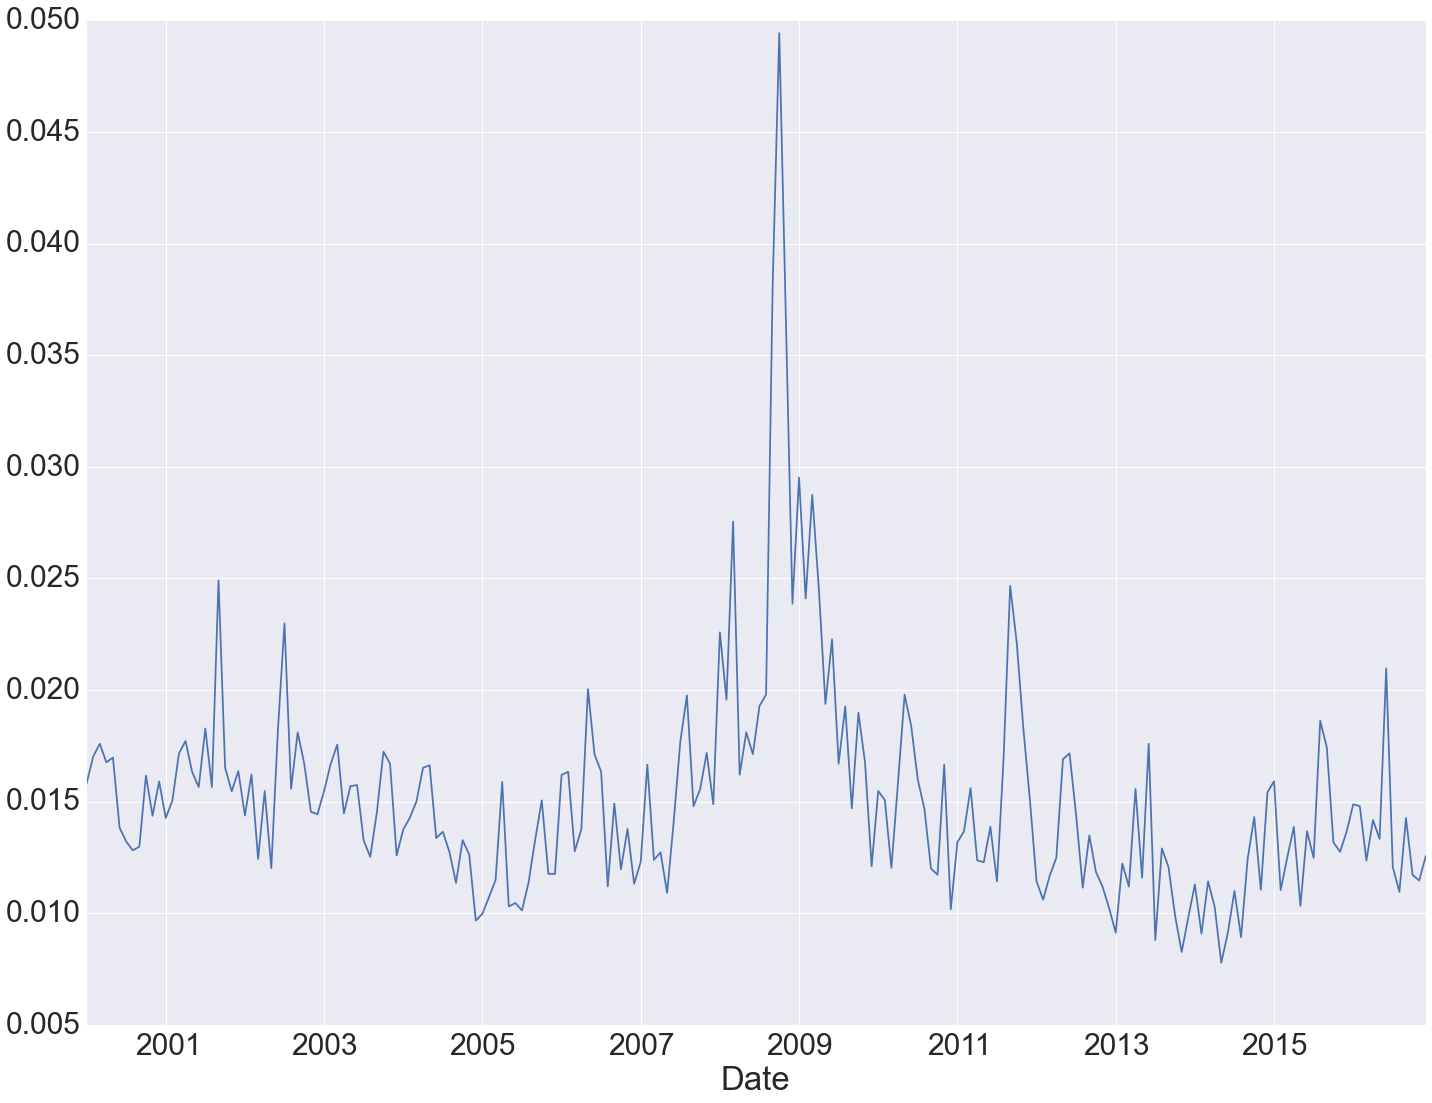

In [4]:
data['2000':'2016'].median(axis=1).plot()

In [5]:
df=pd.DataFrame()
mp =load_maps()
for sect in mp.Sector.unique():
    ind=mp[mp.Sector==sect].index
    new_ind=[]
    for i in ind:
        if i in data.columns:
            new_ind.append(i)
    df[sect]=data[new_ind].median(axis=1)

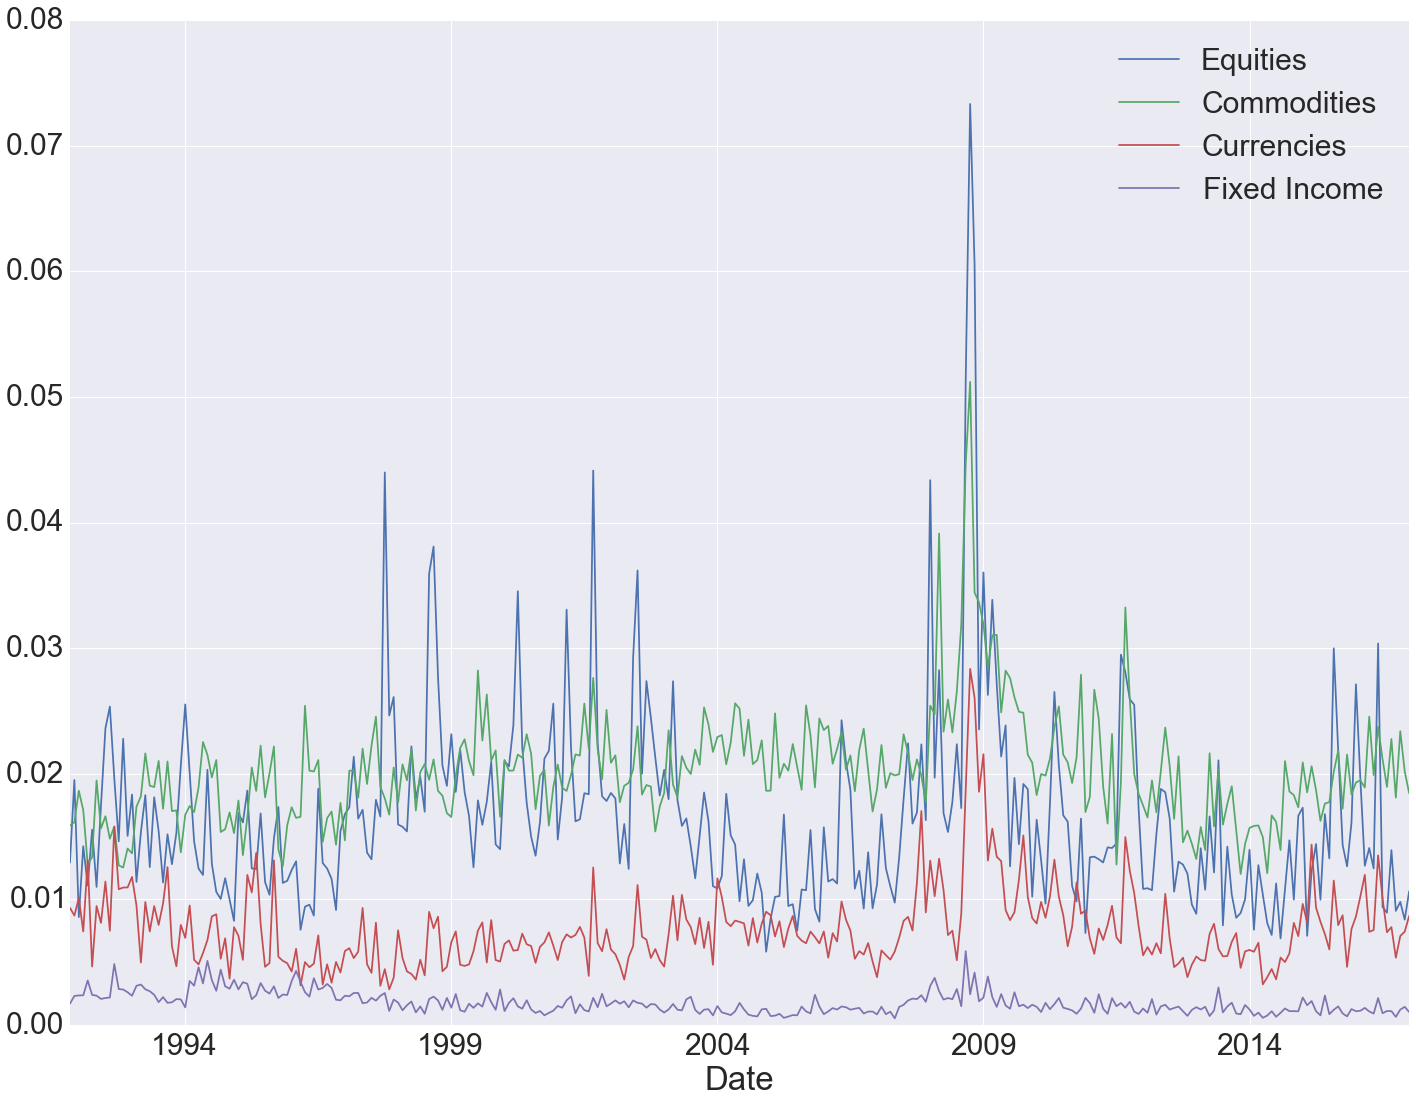

In [6]:
df.dropna().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x102a8da10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10988f490>]], dtype=object)

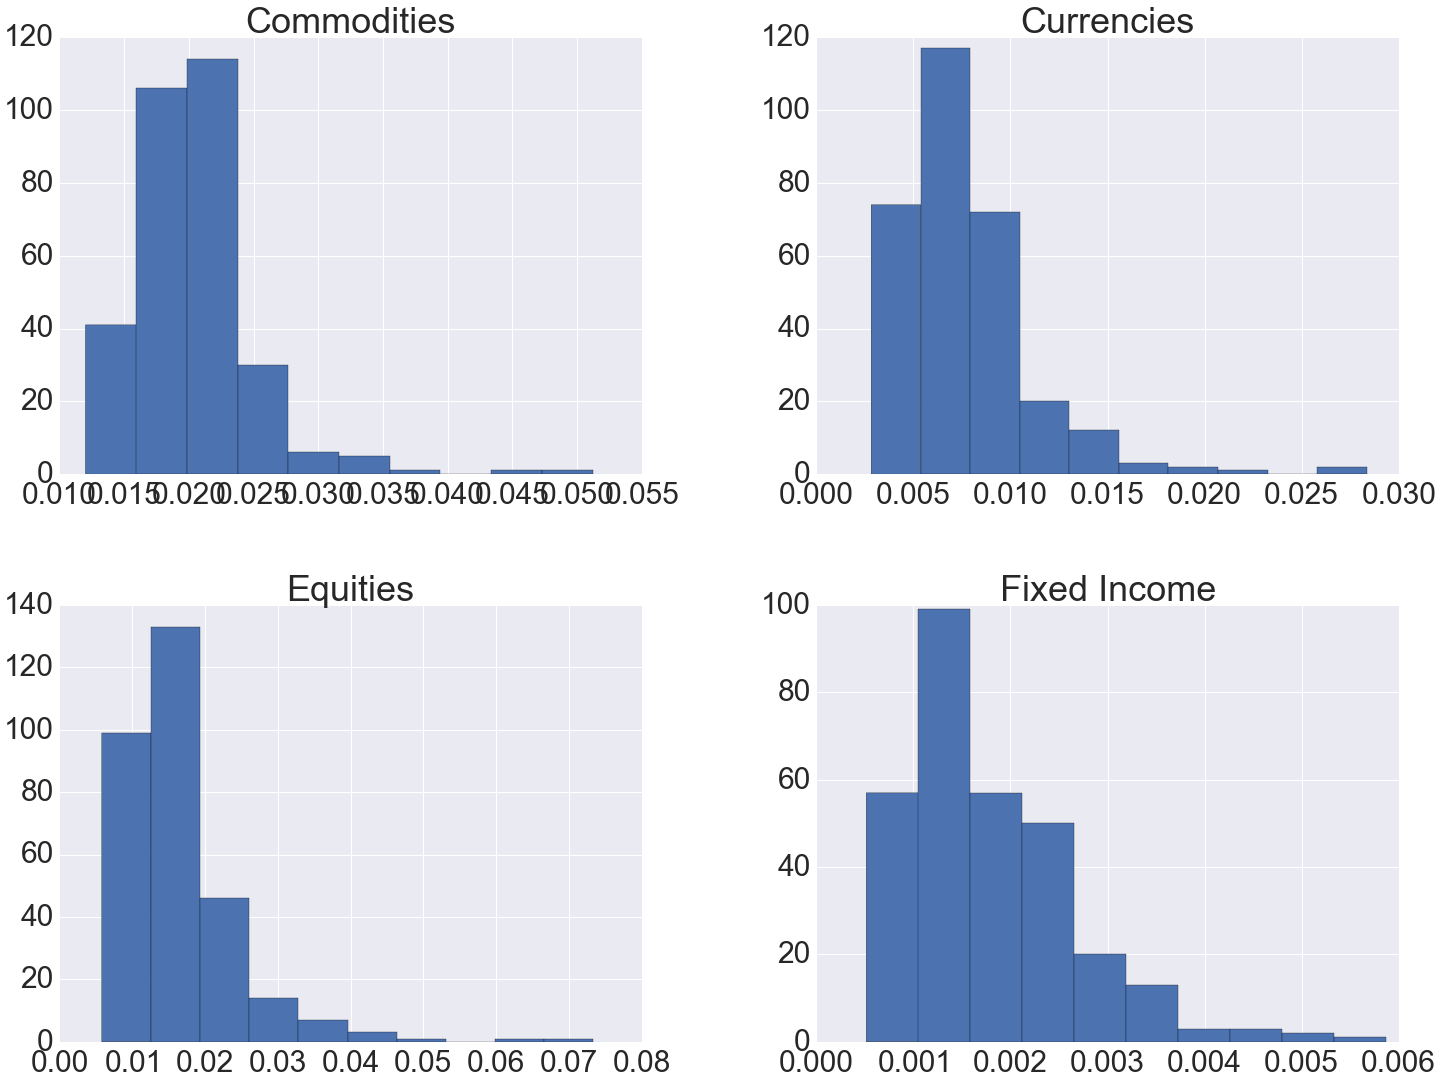

In [7]:
df.hist()

In [8]:
df.mean()

Equities        0.016696
Commodities     0.020271
Currencies      0.007648
Fixed Income    0.001766
dtype: float64

In [9]:
stats=pd.DataFrame()
stats['Mean']=df.mean()
stats['Standard Deviation']=df.std()
stats['Skew']=df.skew()
stats['Kurtosis']=df.kurt()

In [10]:
stats.round(4)

,Mean,Standard Deviation,Skew,Kurtosis
Equities,0.0167,0.0079,2.7193,12.5467
Commodities,0.0203,0.0046,2.0748,9.8021
Currencies,0.0076,0.0033,2.2874,9.2514
Fixed Income,0.0018,0.0009,1.3210,2.4008


In [11]:
print stats.round(4).to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &    Mean &  Standard Deviation &    Skew &  Kurtosis \\
\midrule
Equities     &  0.0167 &              0.0079 &  2.7193 &   12.5467 \\
Commodities  &  0.0203 &              0.0046 &  2.0748 &    9.8021 \\
Currencies   &  0.0076 &              0.0033 &  2.2874 &    9.2514 \\
Fixed Income &  0.0018 &              0.0009 &  1.3210 &    2.4008 \\
\bottomrule
\end{tabular}



In [12]:
stats.to_csv('FHT.csv')

In [13]:
df.dropna().to_csv('FHT_ts.csv')